In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
clinic = pd.read_excel(r'C:\Users\HP\Desktop\Machine learning biociencias\Datos_clinicos\Clinical_Data_Validation_Cohort.xlsx')
clinic.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,Type.Adjuvant,batch,EGFR,KRAS
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,NaN,1,NaN,NaN
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,NaN,1,Negative,Negative
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,NaN,1,Negative,Negative
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,NaN,1,Negative,G12C
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,NaN,1,Negative,Negative


In [46]:
dummies_EGFR = pd.get_dummies(
    clinic['EGFR'],
    prefix='EGFR',
    drop_first=True,
    dtype=int  # <--- aquí fuerzas que sean 0/1 numéricos
    )

df_clinc = pd.concat([clinic, dummies_EGFR['EGFR_Negative']], axis=1)

print(df_clinc.head())

  Patient ID  Survival time (days)  Event (death: 1, alive: 0)  \
0    P109342                  2329                           1   
1    P124450                  2532                           0   
2    P131833                  2271                           0   
3    P131888                  2193                           0   
4    P131946                  2387                           0   

   Tumor size (cm)  Grade Stage (TNM 8th edition)  Age     Sex Cigarette  \
0              2.6      3                      IB   67    Male    Former   
1              3.5      3                      IB   68  Female    Former   
2              2.0      2                     IA2   80  Female     Never   
3              3.0      2                     IA3   63    Male    Former   
4              4.0      2                    IIIA   88  Female     Never   

   Pack per year Type.Adjuvant  batch      EGFR      KRAS  EGFR_Negative  
0           50.0           NaN      1       NaN       NaN              

In [48]:
dummies_KRAS = pd.get_dummies(
    clinic['KRAS'],
    prefix='KRAS',
    drop_first=True,
    dtype=int  # <--- aquí fuerzas que sean 0/1 numéricos
    )
dummies_KRAS.head()

,KRAS_G12C,KRAS_G12D,KRAS_G12F,KRAS_G12R,KRAS_G12V,KRAS_G13C,KRAS_G13D,KRAS_G13F,KRAS_G13R,KRAS_Negative
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [49]:
df_clinc = pd.concat([df_clinc, dummies_KRAS['KRAS_Negative']], axis=1)
df_clinc.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,Type.Adjuvant,batch,EGFR,KRAS,EGFR_Negative,KRAS_Negative
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,NaN,1,NaN,NaN,0,0
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,NaN,1,Negative,Negative,1,1
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,NaN,1,Negative,Negative,1,1
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,NaN,1,Negative,G12C,1,0
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,NaN,1,Negative,Negative,1,1


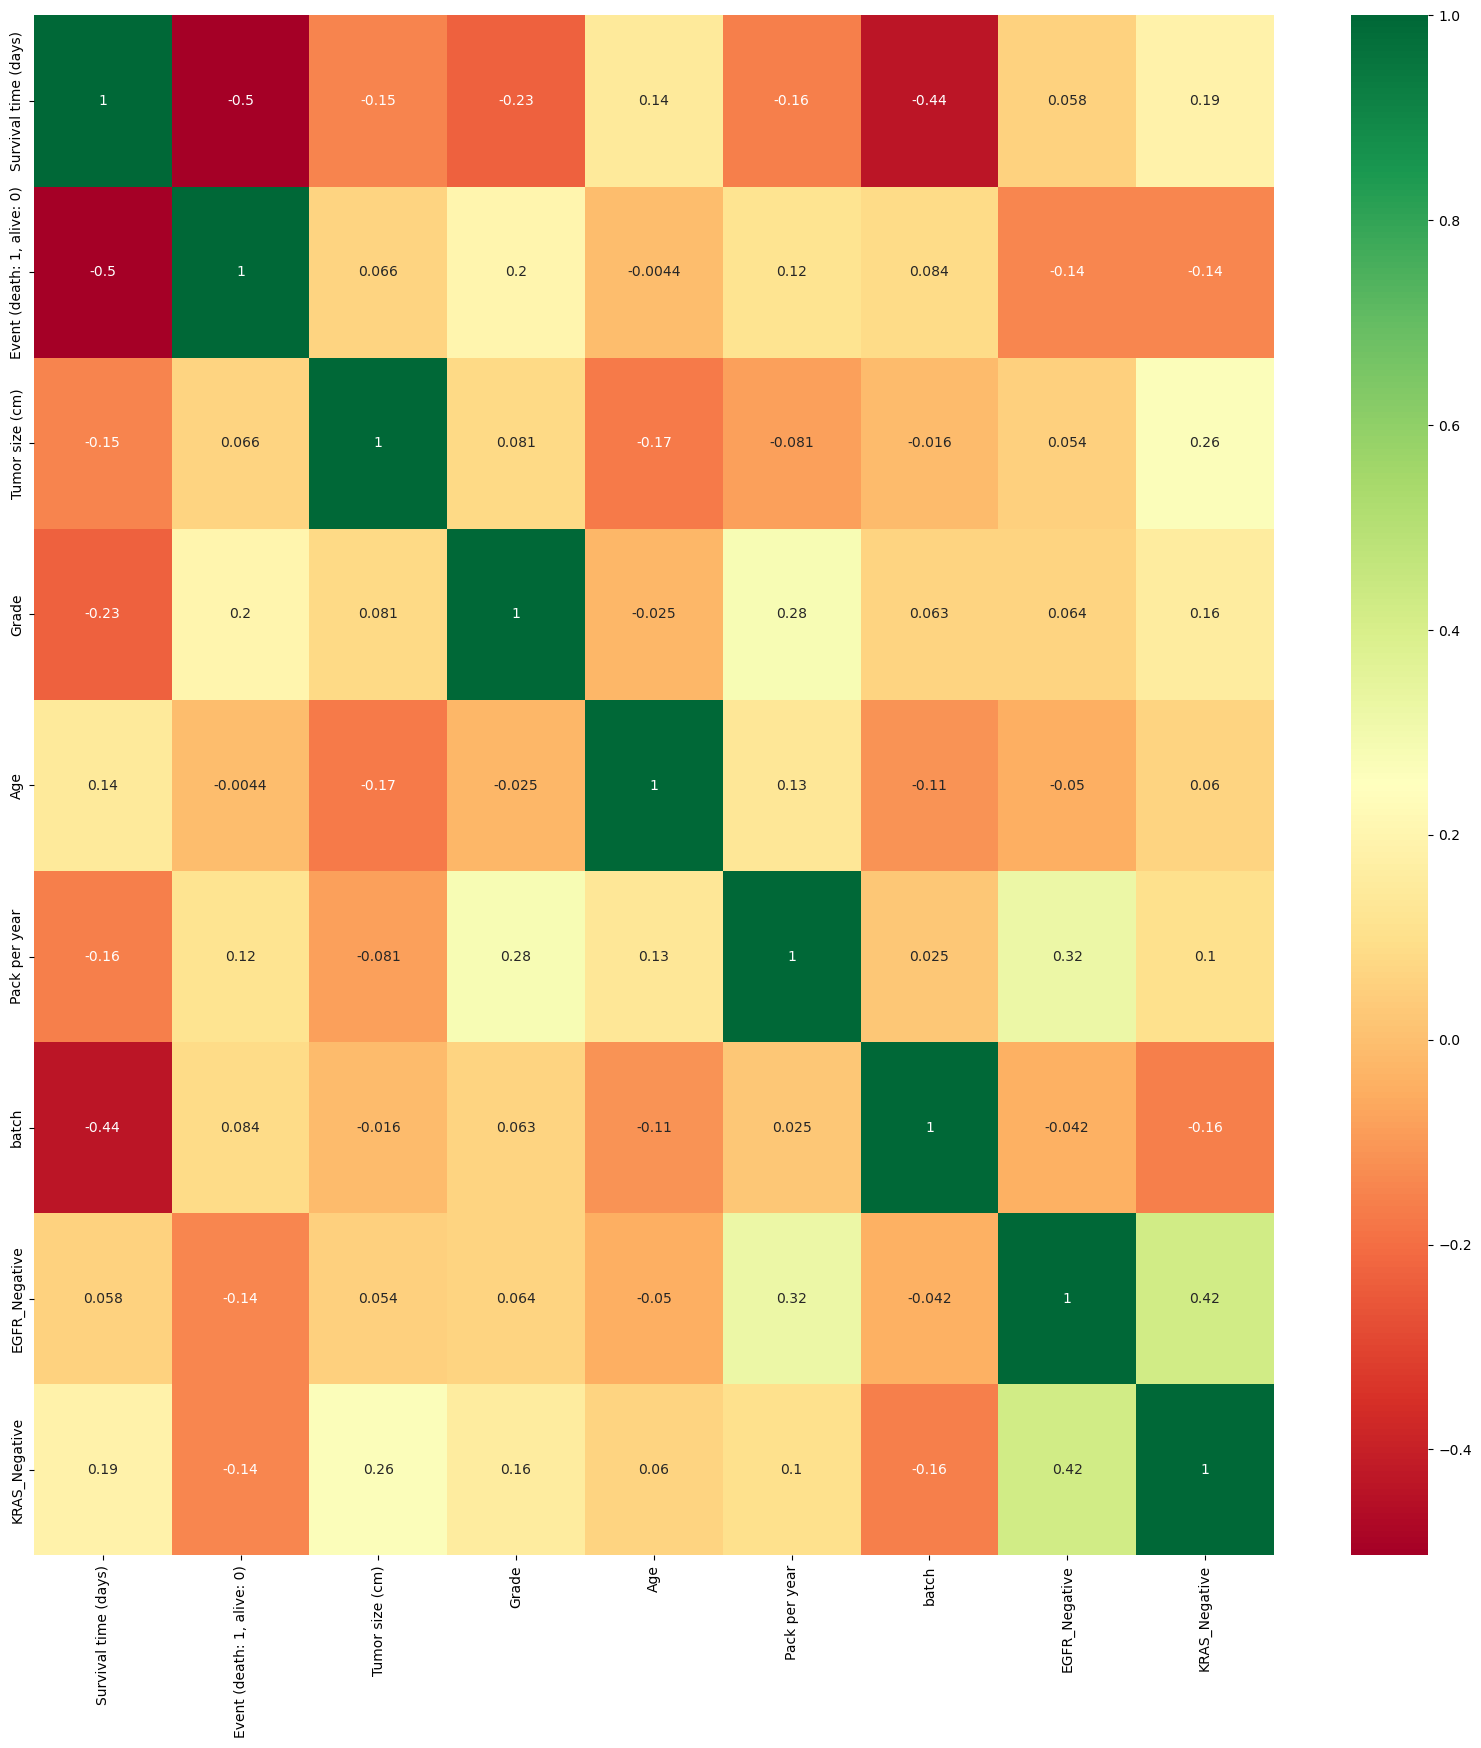

In [50]:
numeric_cols = df_clinc.select_dtypes(include=['number'])
columnas = numeric_cols.columns

correlation_matrix_m = df_clinc[columnas].corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation_matrix_m, cmap= 'RdYlGn', annot =True)
plt.show()

# Primer conclucion
Las caracteristicas que presentaron una mayor correlacion al timpo de supervivencia fueron el grado histologico, las mutaciones en EGFR y KRAS y el numero de paquetes de cigarros al año. Las mutaciones en EGFR y KRASpresentaron una correlacion negativa devido a que solo se evaluo la ausencia de mutaciones en estos genes (Donde 1 es negativo), esto para facilitar este analisis, sin embargo, es posible que esta correlacion sea mayor al tomar encuenta los distintos tipos de mutaciones, dado que algunas de estas mutaciones podrian ser benignas, neutrales o patogenica, al engolobarse por completo estos tres tipos de mutaciones en una sola categoria podria alterar los resultados, para estudios posteriores se tomara en cuenta esto.

In [6]:
clinic.shape

(95, 14)

In [7]:
clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient ID                  95 non-null     object 
 1   Survival time (days)        95 non-null     int64  
 2   Event (death: 1, alive: 0)  95 non-null     int64  
 3   Tumor size (cm)             95 non-null     float64
 4   Grade                       95 non-null     int64  
 5   Stage (TNM 8th edition)     95 non-null     object 
 6   Age                         95 non-null     int64  
 7   Sex                         95 non-null     object 
 8   Cigarette                   95 non-null     object 
 9   Pack per year               95 non-null     float64
 10  Type.Adjuvant               22 non-null     object 
 11  batch                       95 non-null     int64  
 12  EGFR                        86 non-null     object 
 13  KRAS                        65 non-nu

In [8]:
clinic.nunique()

Patient ID                    95
Survival time (days)          89
Event (death: 1, alive: 0)     2
Tumor size (cm)               35
Grade                          3
Stage (TNM 8th edition)        9
Age                           35
Sex                            2
Cigarette                      3
Pack per year                 45
Type.Adjuvant                  3
batch                          3
EGFR                           7
KRAS                          11
dtype: int64

In [9]:
clinic.describe()

,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Age,Pack per year,batch
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,1471.515789,0.410526,2.854737,2.368421,66.589474,29.253684,2.431579
std,681.642133,0.494539,1.365281,0.602347,9.698097,26.205783,0.807579
min,50.000000,0.000000,1.100000,1.000000,48.000000,0.000000,1.000000
25%,898.500000,0.000000,2.000000,2.000000,60.000000,2.125000,2.000000
50%,1760.000000,0.000000,2.400000,2.000000,67.000000,25.000000,3.000000
75%,1981.000000,1.000000,3.500000,3.000000,72.500000,45.000000,3.000000
max,2532.000000,1.000000,7.000000,3.000000,88.000000,105.000000,3.000000


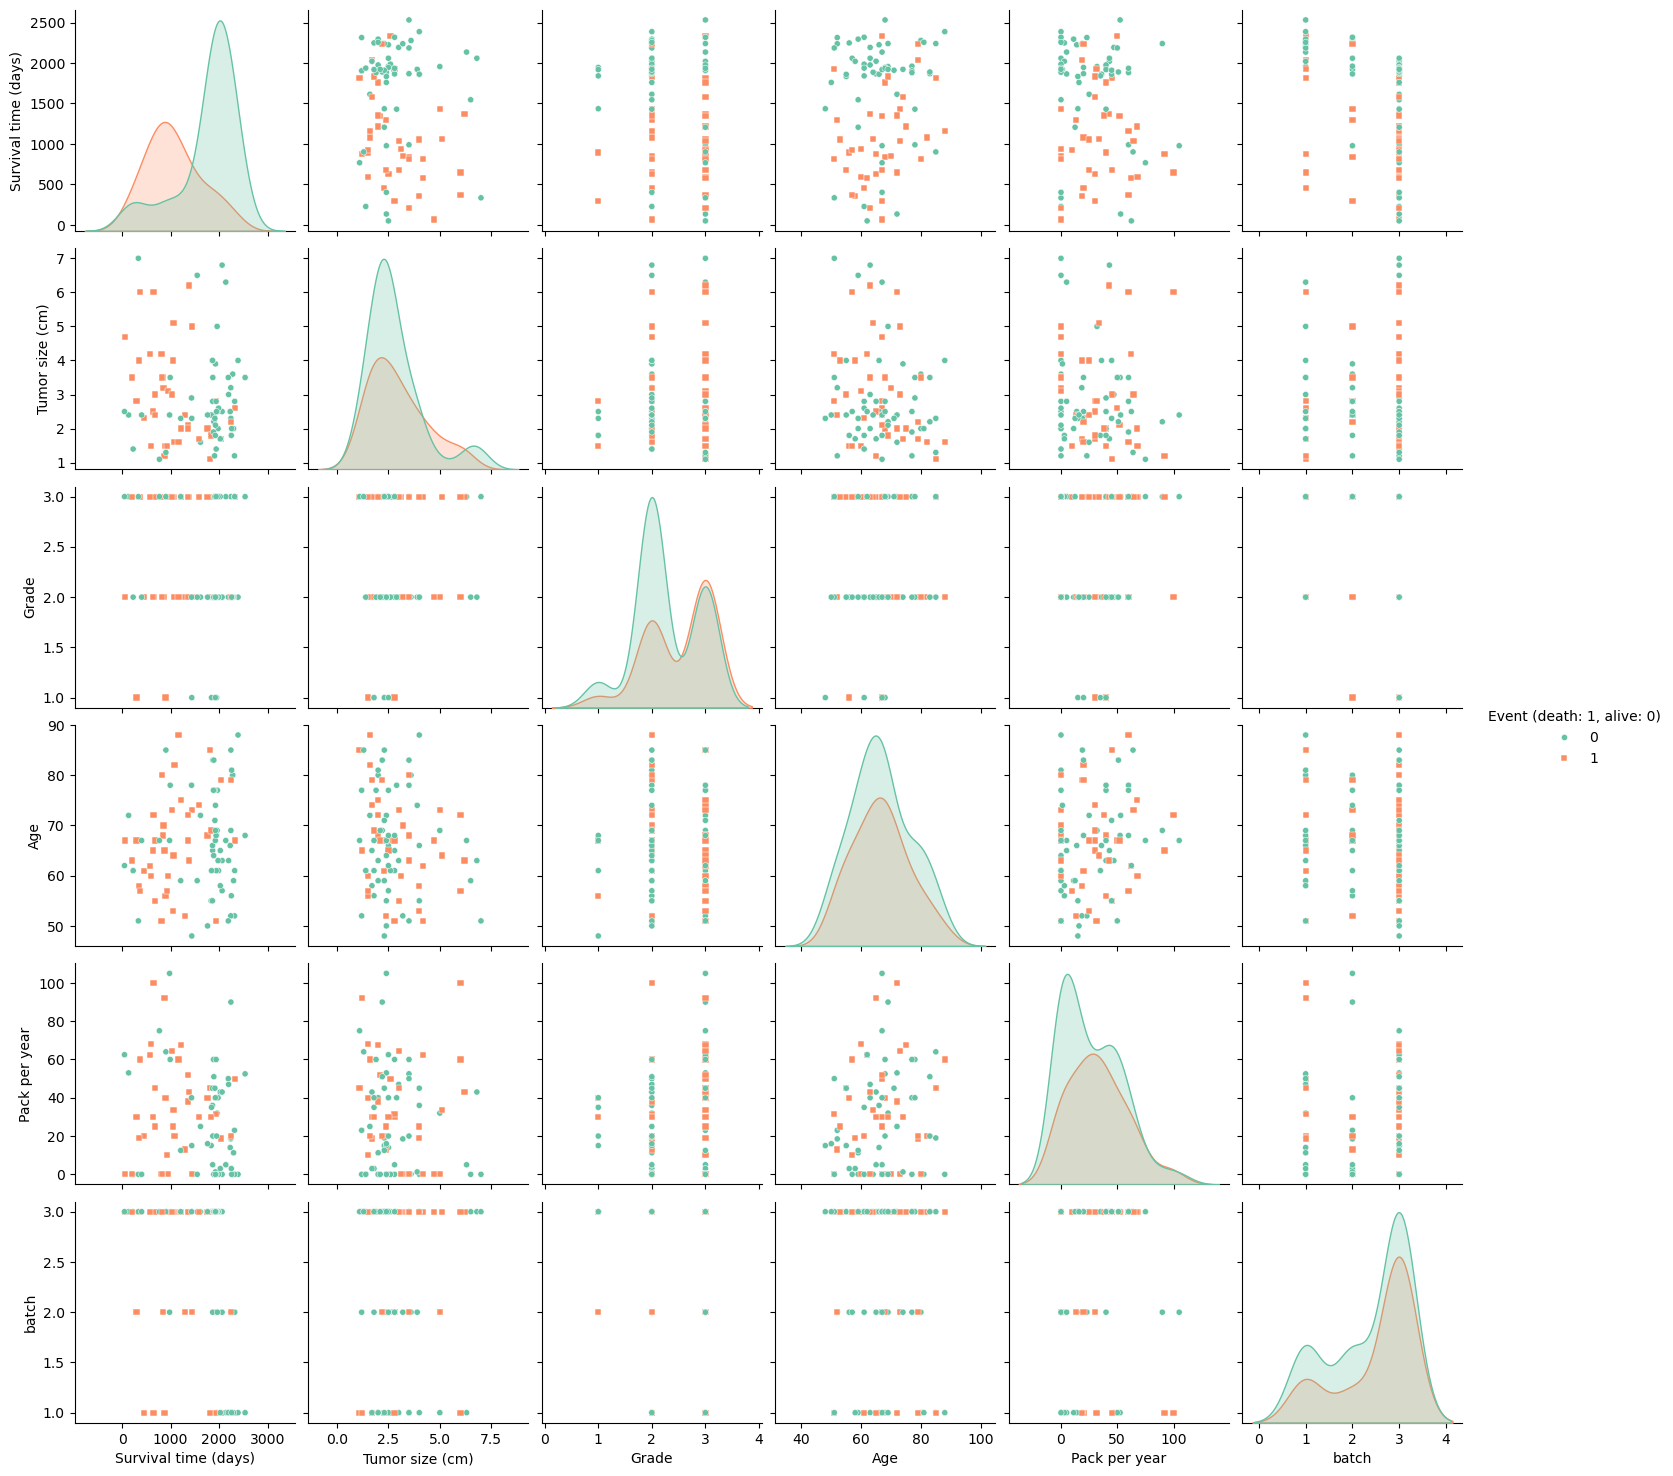

In [51]:
sns.pairplot(clinic, hue='Event (death: 1, alive: 0)', markers=["o", "s"],  plot_kws={"s": 20}, palette="Set2")

In [11]:
clinic.columns

Index(['Patient ID', 'Survival time (days)', 'Event (death: 1, alive: 0)',
       'Tumor size (cm)', 'Grade', 'Stage (TNM 8th edition)', 'Age', 'Sex',
       'Cigarette', 'Pack per year', 'Type.Adjuvant', 'batch', 'EGFR', 'KRAS'],
      dtype='object')

Text(0.5, 1.0, 'Supervivencia vs genero')

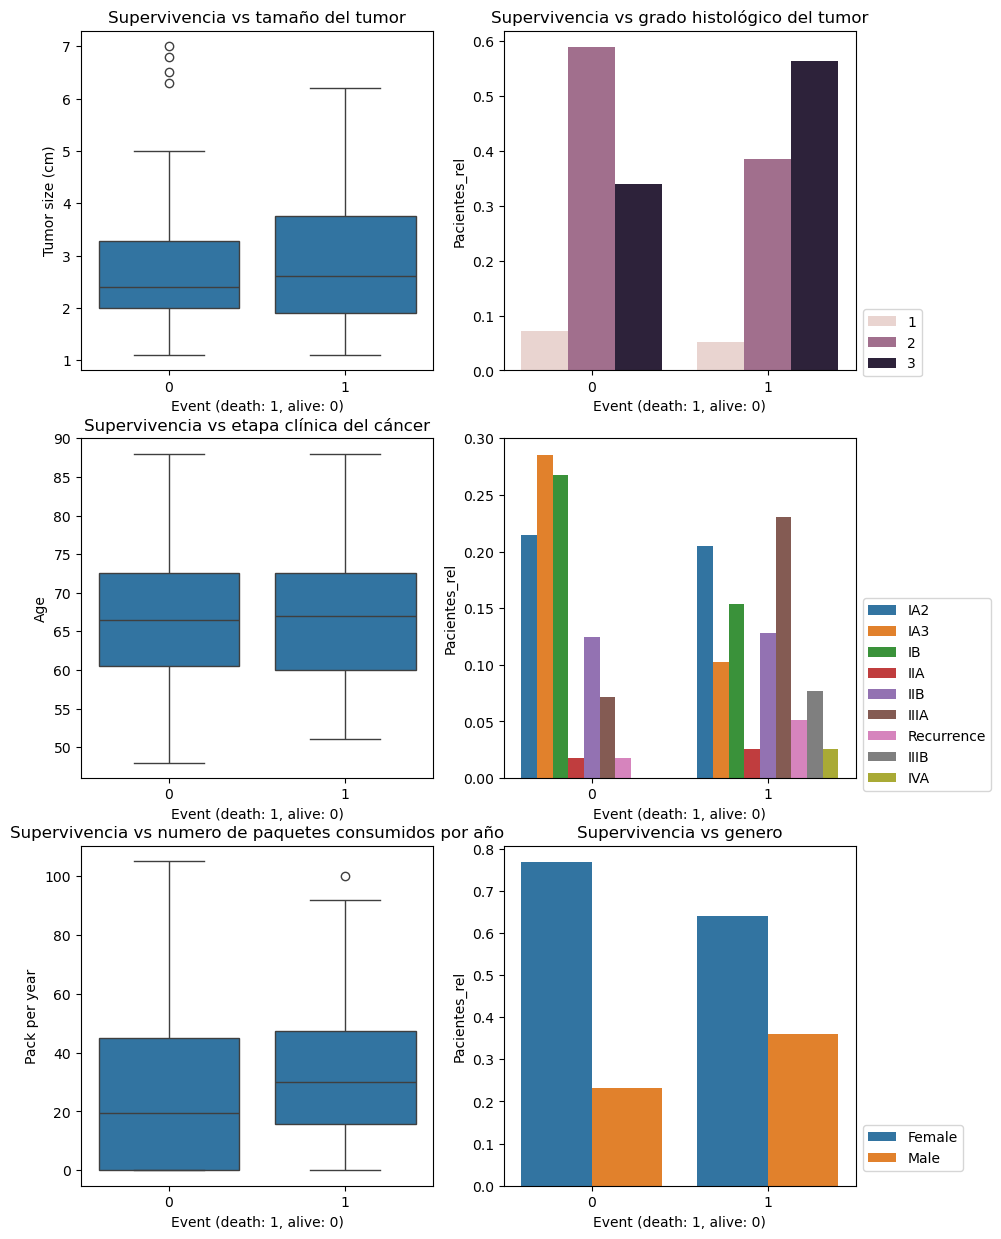

In [40]:
event_grade = clinic.groupby(['Event (death: 1, alive: 0)', 'Grade'])["Patient ID"].nunique().reset_index()
event_grade.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
event_grade_rel = event_grade.copy()
event_grade_rel['Pacientes_rel'] = event_grade_rel.groupby('Event (death: 1, alive: 0)')['Pacientes'].transform(lambda x: x / x.sum())

event_stage = clinic.groupby(['Event (death: 1, alive: 0)', 'Stage (TNM 8th edition)'])["Patient ID"].nunique().reset_index()
event_stage.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
event_stage_rel = event_stage.copy()
event_stage_rel['Pacientes_rel'] = event_stage_rel.groupby('Event (death: 1, alive: 0)')['Pacientes'].transform(lambda x: x / x.sum())

event_gen = clinic.groupby(['Event (death: 1, alive: 0)', 'Sex'])["Patient ID"].nunique().reset_index()
event_gen.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
event_gen_rel = event_gen.copy()
event_gen_rel['Pacientes_rel'] = event_gen_rel.groupby('Event (death: 1, alive: 0)')['Pacientes'].transform(lambda x: x / x.sum())

figure, axs = plt.subplots( 3,2, sharey=False, sharex=False, figsize=(10, 15))

sns.boxplot(x=clinic['Event (death: 1, alive: 0)'], y=clinic['Tumor size (cm)'], ax=axs[0,0])
axs[0,0].set_title('Supervivencia vs tamaño del tumor')

# Gráfica de barras
sns.barplot(data=event_grade_rel, x='Event (death: 1, alive: 0)', y="Pacientes_rel", hue = 'Grade', ax=axs[0,1])
axs[0,1].legend(bbox_to_anchor=(1, 0.2), loc='upper left')
axs[0,1].set_title('Supervivencia vs grado histológico del tumor')

sns.barplot(data=event_stage_rel, x='Event (death: 1, alive: 0)', y="Pacientes_rel", hue = 'Stage (TNM 8th edition)', ax=axs[1,1])
axs[1,1].legend(bbox_to_anchor=(1, 0.55), loc='upper left')

sns.boxplot(x=clinic['Event (death: 1, alive: 0)'], y=clinic['Age'], ax=axs[1,0])
axs[1,0].set_title('Supervivencia vs etapa clínica del cáncer')

sns.boxplot(x=clinic['Event (death: 1, alive: 0)'], y=clinic['Pack per year'], ax=axs[2,0])
axs[2,0].set_title('Supervivencia vs numero de paquetes consumidos por año')

sns.barplot(data=event_gen_rel, x='Event (death: 1, alive: 0)', y="Pacientes_rel", hue = 'Sex', ax=axs[2,1])
axs[2,1].legend(bbox_to_anchor=(1, 0.2), loc='upper left')
axs[2,1].set_title('Supervivencia vs genero')


In [52]:
clinic.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,Type.Adjuvant,batch,EGFR,KRAS
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,NaN,1,NaN,NaN
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,NaN,1,Negative,Negative
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,NaN,1,Negative,Negative
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,NaN,1,Negative,G12C
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,NaN,1,Negative,Negative


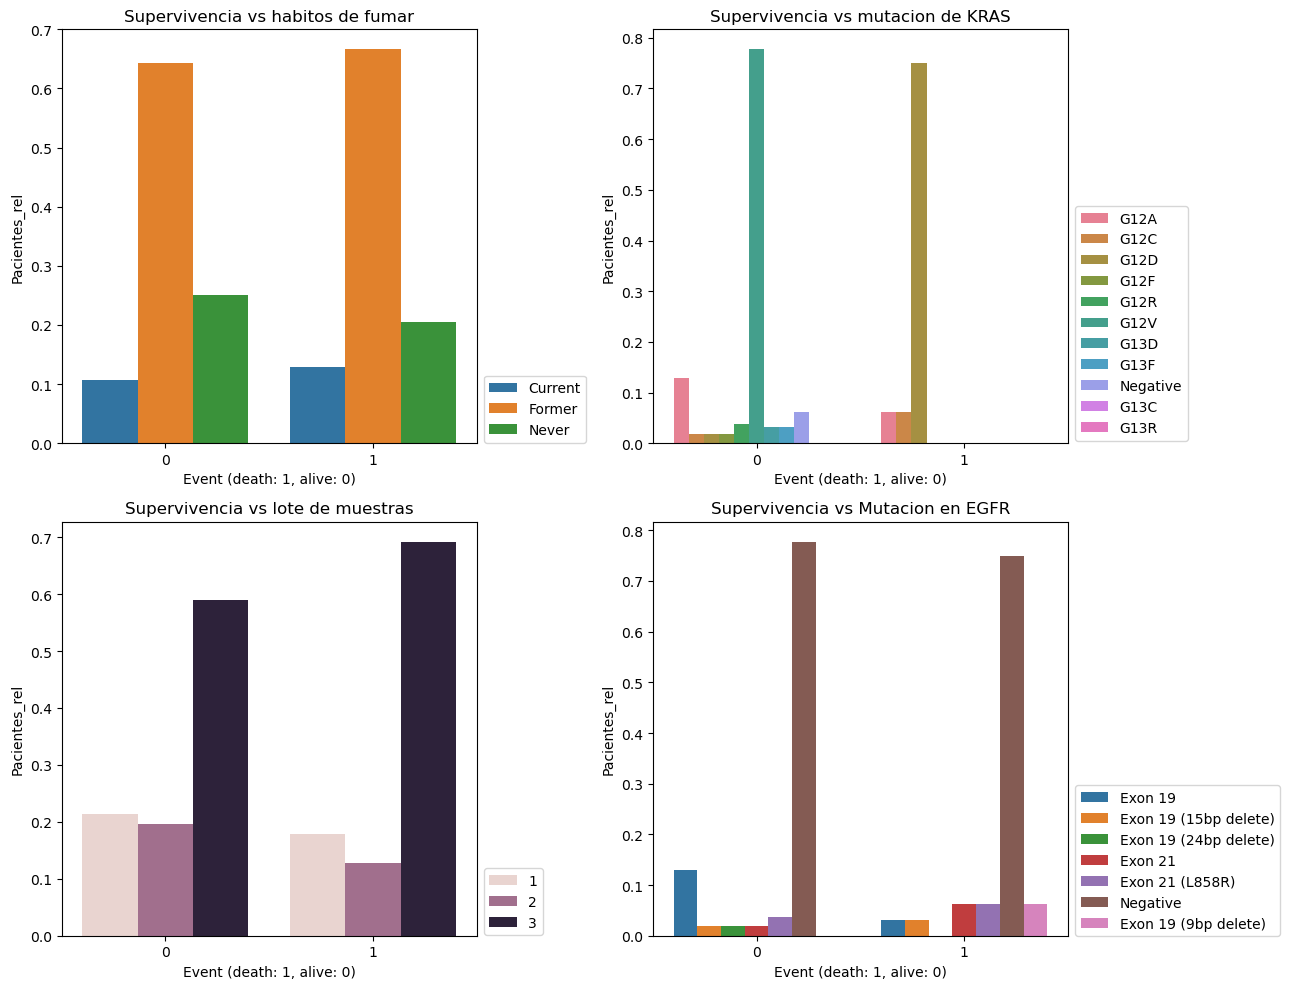

In [70]:
event_fum = clinic.groupby(['Event (death: 1, alive: 0)', 'Cigarette'])["Patient ID"].nunique().reset_index()
event_fum.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
event_fum_rel = event_fum.copy()
event_fum_rel['Pacientes_rel'] = event_fum_rel.groupby('Event (death: 1, alive: 0)')['Pacientes'].transform(lambda x: x / x.sum())

event_batch = clinic.groupby(['Event (death: 1, alive: 0)', 'batch'])["Patient ID"].nunique().reset_index()
event_batch.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
event_batch_rel = event_batch.copy()
event_batch_rel['Pacientes_rel'] = event_batch_rel.groupby('Event (death: 1, alive: 0)')['Pacientes'].transform(lambda x: x / x.sum())

event_EGFR = clinic.groupby(['Event (death: 1, alive: 0)', 'EGFR'])["Patient ID"].nunique().reset_index()
event_EGFR.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
event_EGFR_rel = event_EGFR.copy()
event_EGFR_rel['Pacientes_rel'] = event_EGFR_rel.groupby('Event (death: 1, alive: 0)')['Pacientes'].transform(lambda x: x / x.sum())

event_KRAS = clinic.groupby(['Event (death: 1, alive: 0)', 'KRAS'])["Patient ID"].nunique().reset_index()
event_KRAS.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
event_KRAS_rel = event_KRAS.copy()
event_KRAS_rel['Pacientes_rel'] = event_EGFR_rel.groupby('Event (death: 1, alive: 0)')['Pacientes'].transform(lambda x: x / x.sum())

figure, axs = plt.subplots( 2,2, sharey=False, sharex=False, figsize=(13, 10))

sns.barplot(data=event_KRAS_rel, x='Event (death: 1, alive: 0)', y="Pacientes_rel", hue = 'KRAS', ax=axs[0,1])
axs[0,1].legend(bbox_to_anchor=(1, 0.59), loc='upper left')
axs[0,1].set_title('Supervivencia vs mutacion de KRAS')

# Gráfica de barras
sns.barplot(data=event_fum_rel, x='Event (death: 1, alive: 0)', y="Pacientes_rel", hue = 'Cigarette', ax=axs[0,0])
axs[0,0].legend(bbox_to_anchor=(1, 0.18), loc='upper left')
axs[0,0].set_title('Supervivencia vs habitos de fumar')

sns.barplot(data=event_batch_rel, x='Event (death: 1, alive: 0)', y="Pacientes_rel", hue = 'batch', ax=axs[1,0])
axs[1,0].legend(bbox_to_anchor=(1, 0.18), loc='upper left')
axs[1,0].set_title('Supervivencia vs lote de muestras')

sns.barplot(data=event_EGFR_rel, x='Event (death: 1, alive: 0)', y="Pacientes_rel", hue = 'EGFR', ax=axs[1,1])
axs[1,1].legend(bbox_to_anchor=(1, 0.38), loc='upper left')
axs[1,1].set_title('Supervivencia vs Mutacion en EGFR')
plt.tight_layout()
plt.show()

## Procesamiento de datos faltantes con imputacion iterativa

In [71]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder

In [87]:
clinic_d = clinic.drop('Type.Adjuvant', axis=1)
# Paso 1: seleccionar las columnas
df_encoded = clinic_d[['EGFR', 'KRAS']].copy()

# Paso 2: codificar categorías
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
df_encoded[['EGFR','KRAS']] = encoder.fit_transform(df_encoded)

# Paso 3: imputar valores faltantes
imp = IterativeImputer(random_state=0, max_iter=10)
df_imputed = imp.fit_transform(df_encoded)

# Paso 4: devolver a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=['EGFR','KRAS'])

# Paso 5: opcional, convertir de nuevo a categorías originales
df_imputed[['EGFR','KRAS']] = encoder.inverse_transform(df_imputed)

df_imputed.head()

,EGFR,KRAS
0,Exon 21 (L858R),G13C
1,Negative,Negative
2,Negative,Negative
3,Negative,G12C
4,Negative,Negative


In [89]:
clinic.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,Type.Adjuvant,batch,EGFR,KRAS
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,NaN,1,NaN,NaN
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,NaN,1,Negative,Negative
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,NaN,1,Negative,Negative
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,NaN,1,Negative,G12C
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,NaN,1,Negative,Negative


In [88]:
df_imputed.groupby('EGFR').count()

,KRAS
EGFR,
Exon 19,8
Exon 19 (15bp delete),2
Exon 19 (24bp delete),1
Exon 19 (9bp delete),2
Exon 21,3
Exon 21 (L858R),13
Negative,66


In [86]:
df_imputed.groupby('KRAS').count()

,EGFR
KRAS,
G12A,3
G12C,9
G12D,6
G12F,2
G12R,1
G12V,8
G13C,31
G13D,1
G13F,1


In [ ]:
clinic_d = clinic_d.drop(['EGFR','KRAS'], axis=1)

In [92]:
clinic_d = pd.concat([clinic_d, df_imputed], axis=1)

In [93]:
clinic_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient ID                  95 non-null     object 
 1   Survival time (days)        95 non-null     int64  
 2   Event (death: 1, alive: 0)  95 non-null     int64  
 3   Tumor size (cm)             95 non-null     float64
 4   Grade                       95 non-null     int64  
 5   Stage (TNM 8th edition)     95 non-null     object 
 6   Age                         95 non-null     int64  
 7   Sex                         95 non-null     object 
 8   Cigarette                   95 non-null     object 
 9   Pack per year               95 non-null     float64
 10  batch                       95 non-null     int64  
 11  EGFR                        95 non-null     object 
 12  KRAS                        95 non-null     object 
dtypes: float64(2), int64(5), object(6)
me

# Construccion del modelo Arbol de decision

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [97]:
clinic_d.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,batch,EGFR,KRAS
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,1,Exon 21 (L858R),G13C
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,1,Negative,Negative
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,1,Negative,Negative
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,1,Negative,G12C
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,1,Negative,Negative


In [98]:
clinic_d.columns

Index(['Patient ID', 'Survival time (days)', 'Event (death: 1, alive: 0)',
       'Tumor size (cm)', 'Grade', 'Stage (TNM 8th edition)', 'Age', 'Sex',
       'Cigarette', 'Pack per year', 'batch', 'EGFR', 'KRAS'],
      dtype='object')

In [99]:
columnas_f = clinic_d.columns
predictores = columnas_f[3:]
objetivo = columnas_f[2]

In [102]:
from sklearn.preprocessing import OrdinalEncoder

# Seleccionamos las columnas categóricas automáticamente
categorical_cols = clinic_d.select_dtypes(include=['object']).columns

# Crear el encoder
encoder = OrdinalEncoder()

# Aplicar encoder
clinic_encoded = clinic_d.copy()
clinic_encoded[categorical_cols] = encoder.fit_transform(clinic_d[categorical_cols])

clinic_encoded.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,batch,EGFR,KRAS
0,0.0,2329,1,2.6,3,2.0,67,1.0,1.0,50.0,1,5.0,6.0
1,1.0,2532,0,3.5,3,2.0,68,0.0,1.0,52.5,1,6.0,10.0
2,2.0,2271,0,2.0,2,0.0,80,0.0,2.0,0.0,1,6.0,10.0
3,3.0,2193,0,3.0,2,1.0,63,1.0,1.0,47.0,1,6.0,1.0
4,4.0,2387,0,4.0,2,5.0,88,0.0,2.0,0.0,1,6.0,10.0


In [130]:
x_train, x_test, y_train, y_test = train_test_split(
    clinic_encoded[predictores], clinic_encoded[objetivo], test_size=0.3, random_state=42)

In [131]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, random_state=0)
tree.fit(x_train,y_train)
pred = tree.predict(x_test)
pd.crosstab(y_test, pred, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,12,3
1,7,7


## Construccion del modelo con Knn

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [ ]:
# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)

# Optimizar número de componentes PCA
componentes = [5, 10, 15, 20, 25, 30]  # probar varios
pca_scores = []

for n in componentes:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    
    knn = KNeighborsClassifier(n_neighbors=5)  # valor temporal de n_neighbors
    score = cross_val_score(knn, X_pca, y_train, cv=5, scoring='accuracy').mean()
    pca_scores.append(score)

# Elegir el menor número de componentes con buen score
mejor_n_components = componentes[np.argmax(pca_scores)]
print("Mejor n_components:", mejor_n_components)

# Transformar con PCA óptimo
pca_final = PCA(n_components=mejor_n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

# Optimizar n_neighbors
vecinos = range(1, 21)
knn_scores = []

for k in vecinos:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_pca_final, y_train, cv=5, scoring='accuracy').mean()
    knn_scores.append(score)

mejor_n_neighbors = vecinos[np.argmax(knn_scores)]
print("Mejor n_neighbors:", mejor_n_neighbors)
print("Mejor accuracy:", max(knn_scores))